<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [16]:
# Loading the dataset:
customerpref = pd.read_csv('Wholesale customers data.csv')
customerpref.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [17]:
# Checking the first 5 rows of the dataset:
customerpref.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
# Checking the summary of the dataset:
customerpref.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
# Checking data types and null values:
customerpref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [25]:
# Description of each column
column_descriptions = {
    'Channel': 'Customer channel: 1 = Horeca (Hotel/Restaurant/Cafe), 2 = Retail',
    'Region': 'Geographic region: 1 = Lisbon, 2 = Oporto, 3 = Other Region',
    'Fresh': 'Annual spending on fresh produce',
    'Milk': 'Annual spending on milk products',
    'Grocery': 'Annual spending on grocery items',
    'Frozen': 'Annual spending on frozen products',
    'Detergents_Paper': 'Annual spending on detergents and paper products',
    'Delicassen': 'Annual spending on delicatessen products'
}

for column, description in column_descriptions.items():
    print(f"{column}: {description}")


Channel: Customer channel: 1 = Horeca (Hotel/Restaurant/Cafe), 2 = Retail
Region: Geographic region: 1 = Lisbon, 2 = Oporto, 3 = Other Region
Fresh: Annual spending on fresh produce
Milk: Annual spending on milk products
Grocery: Annual spending on grocery items
Frozen: Annual spending on frozen products
Detergents_Paper: Annual spending on detergents and paper products
Delicassen: Annual spending on delicatessen products


In [27]:
# Checking unique values in potential categorical columns
print("Channel:", customerpref['Channel'].unique())
print("Region:", customerpref['Region'].unique())

Channel: [2 1]
Region: [3 1 2]


In [28]:
# checking for missing values
customerpref.isnull().sum(axis=0)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

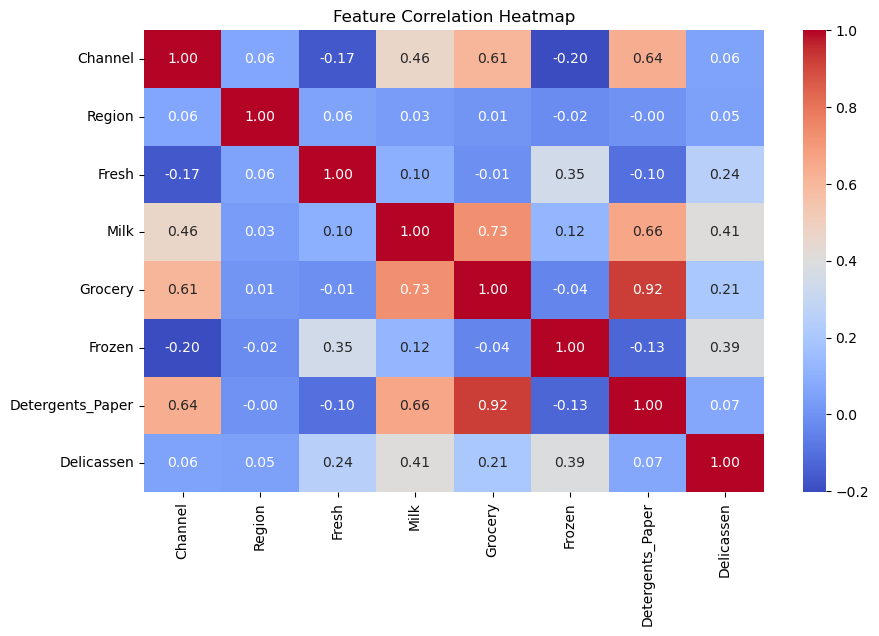

In [29]:

# Checking for duplicates
# Computing correlation matrix for numerical columns
corr = customerpref.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [41]:
# Normalizing the features
features = customerpref.drop(columns=['Channel', 'Region'])

features.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


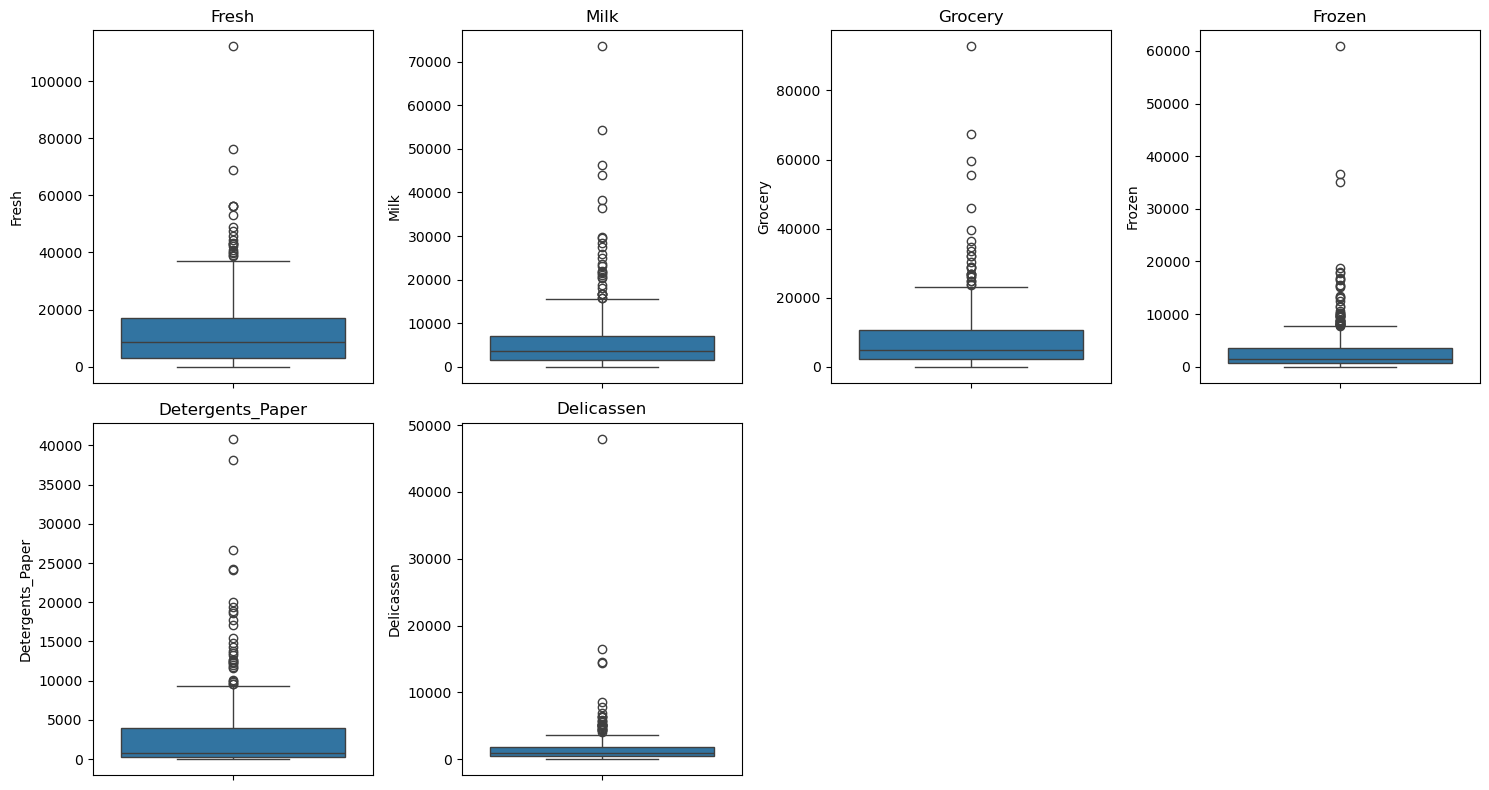

In [42]:
# Checking for outliers using boxplots
plt.figure(figsize=(15, 8))

# Defining numeric columns
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=customerpref[col])
    plt.title(col)

plt.tight_layout()
plt.show()


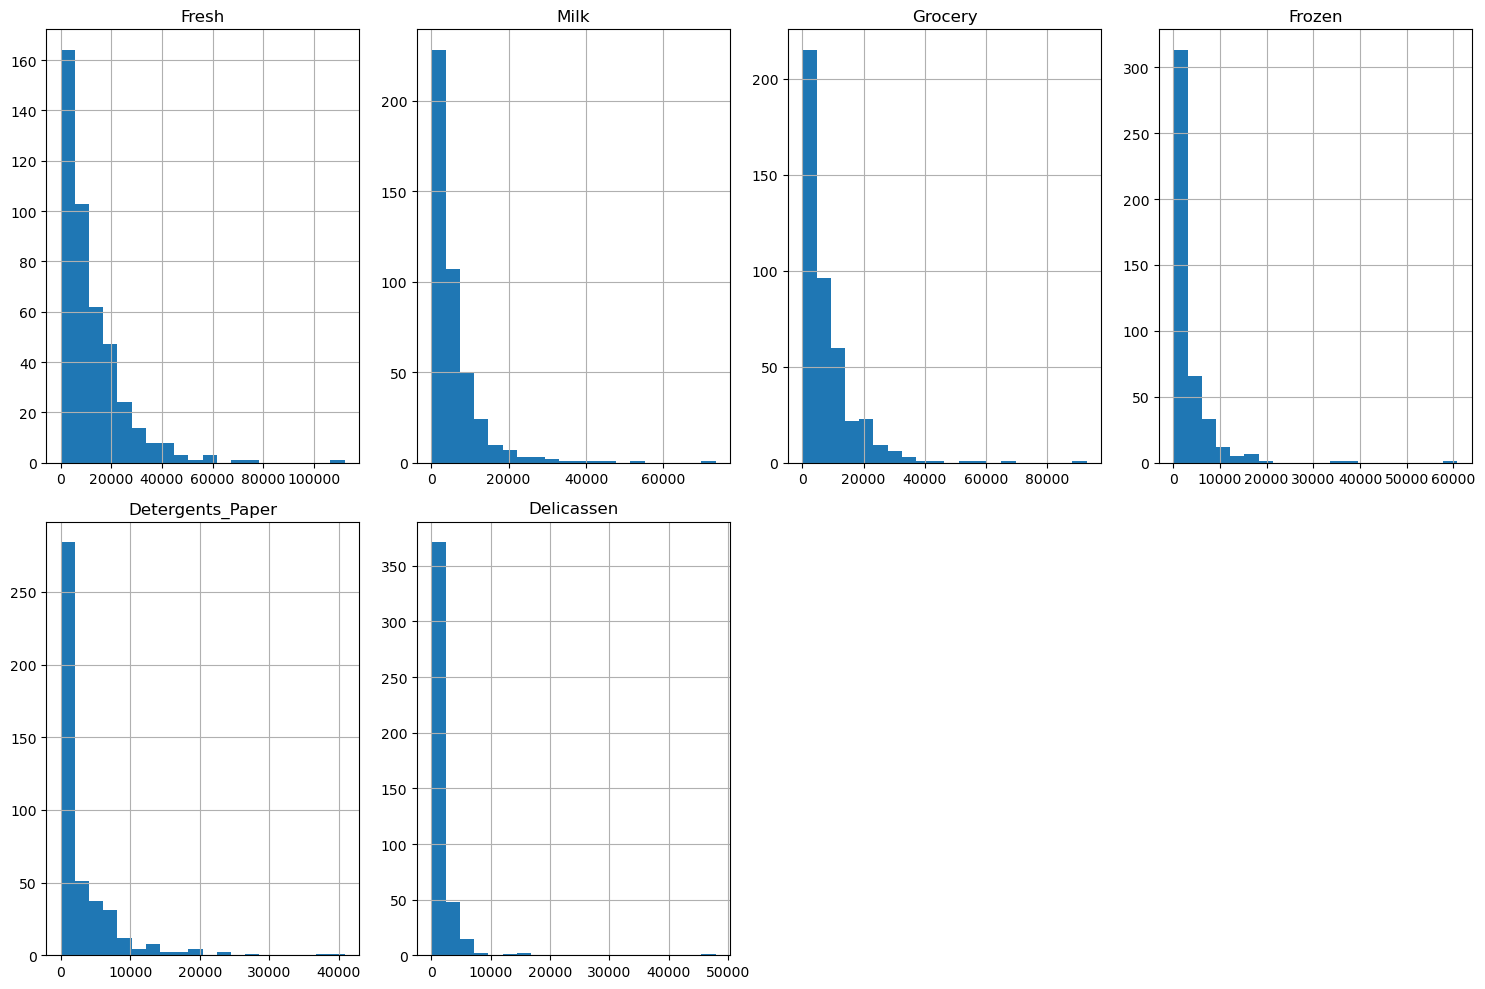

In [43]:
# Checking for outliers using histograms
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
customerpref[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(2, 4))
plt.tight_layout()
plt.show()


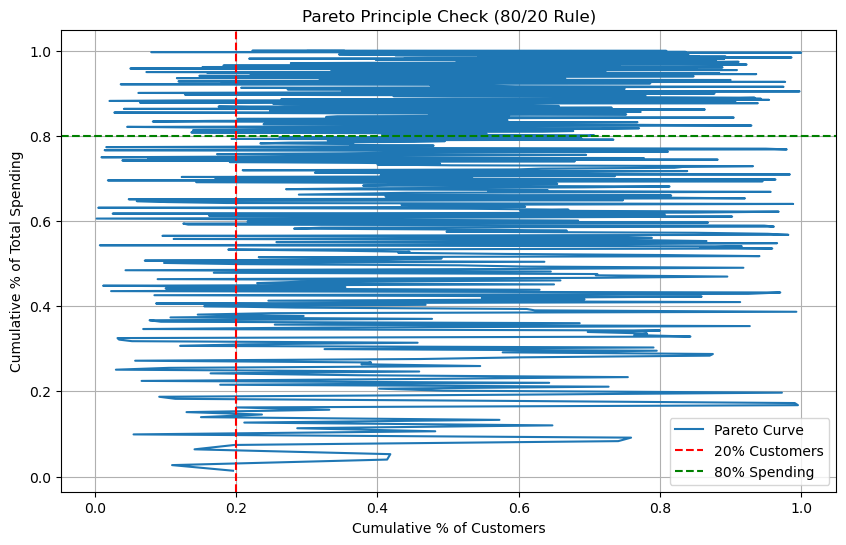

In [44]:
# Creating a TotalSpending column
customerpref['TotalSpending'] = features.sum(axis=1)

# Sorting by TotalSpending in descending order
sorted_customers = customerpref.sort_values(by='TotalSpending', ascending=False)

# Computing cumulative percentage of customers and their contribution to revenue
sorted_customers['CumulativeCustomerPct'] = sorted_customers.index.to_series().rank(method='first') / len(sorted_customers)
sorted_customers['CumulativeSpendingPct'] = sorted_customers['TotalSpending'].cumsum() / sorted_customers['TotalSpending'].sum()

# Plot to visually inspect the Pareto Principle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sorted_customers['CumulativeCustomerPct'], sorted_customers['CumulativeSpendingPct'], label='Pareto Curve')
plt.axvline(x=0.2, color='r', linestyle='--', label='20% Customers')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Spending')
plt.title('Pareto Principle Check (80/20 Rule)')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Total Spending')
plt.legend()
plt.grid(True)
plt.show()



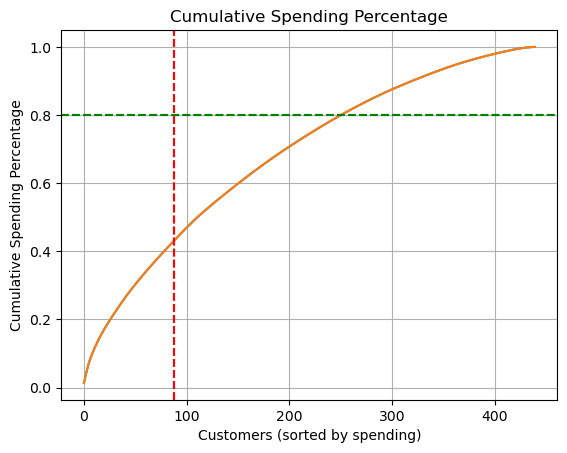

In [46]:
total = customerpref['TotalSpending'].sum()
customerpref_sorted = customerpref.sort_values('TotalSpending', ascending=False)
customerpref_sorted['cum_spending'] = customerpref_sorted['TotalSpending'].cumsum()
customerpref_sorted['cum_spending_pct'] = customerpref_sorted['cum_spending'] / total

plt.plot(customerpref_sorted['cum_spending_pct'].values)
plt.axvline(x=0.2 * len(customerpref_sorted), color='r', linestyle='--')
plt.axhline(y=0.8, color='g', linestyle='--')
plt.title('Cumulative Spending Percentage')
plt.xlabel('Customers (sorted by spending)')
plt.ylabel('Cumulative Spending Percentage')
plt.grid()
plt.show()

**Your observations here**

- There is no missing data to remove.
- From the heatmap, i saw that Grocery and Detergents_Paper have a very high correlation (0.92).
- Grocery and Milk also have a high correlation (0.73).
- Outliers are present in all the spending categories (Fresh, Milk, Grocery, Frozen, Detergents_paper and Delicassen). I find that these are extreme values and may skew the mean.
- All features are right-skewed.
- My final cumulative spending plots show




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

**Your comment here**

-  No cleaning is required, but transformation is needed due to presence of outliers and varying scales across features like Fresh, Milk, and Detergents_Paper.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [47]:
# Importing necessary libraries for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit_transform(features)


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [54]:
from sklearn.cluster import KMeans


### Looking to the elbow we can choose 2 like the correct number of clusters

In [55]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [58]:
# Creating a copy of the original features 
clean_customers = features.copy()

In [59]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [60]:
pd.Series(labels).value_counts()

1    426
0     14
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [61]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)


DBSCAN()

In [62]:
# Creating a copy of the original features
clean_customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [64]:
clean_customers['labels_DBSCAN'].value_counts()


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [65]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

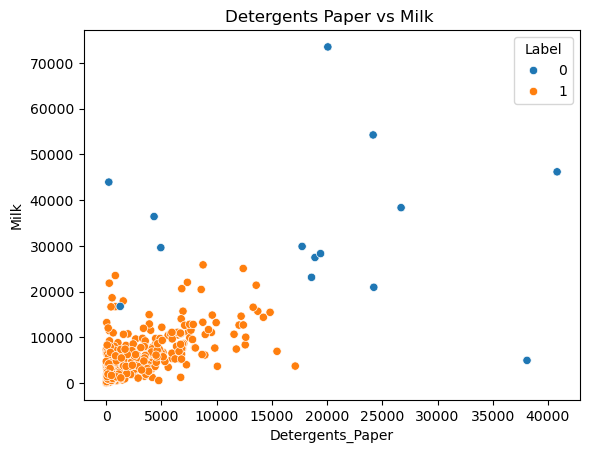

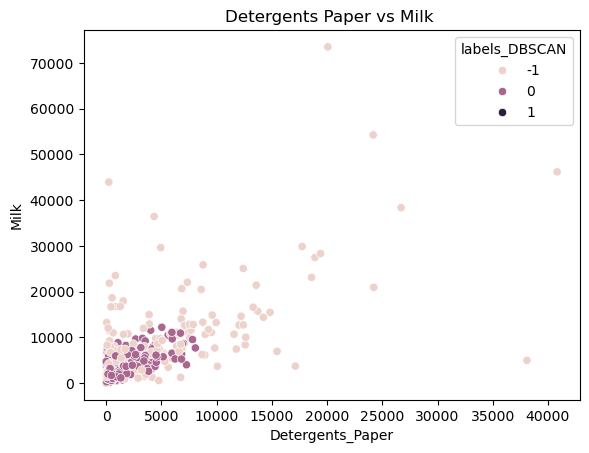

In [74]:
# Plotting the clusters using KMeans
plot(x=clean_customers['Detergents_Paper'],
     y=clean_customers['Milk'],
     hue=clean_customers['Label'])

# Plotting the clusters using DBSCAN
plot(x=clean_customers['Detergents_Paper'],
     y=clean_customers['Milk'],
     hue=clean_customers['labels_DBSCAN'])


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

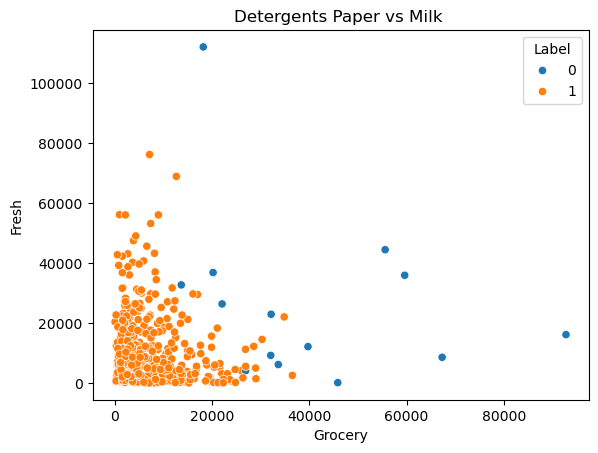

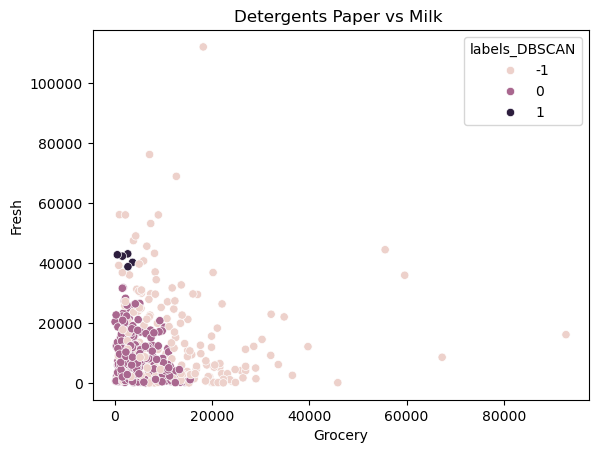

In [75]:
# Plotting the clusters using KMeans
plot(x=clean_customers['Grocery'],
     y=clean_customers['Fresh'],
     hue=clean_customers['Label'])

# Plotting the clusters using DBSCAN
plot(x=clean_customers['Grocery'],
     y=clean_customers['Fresh'],
     hue=clean_customers['labels_DBSCAN'])



Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

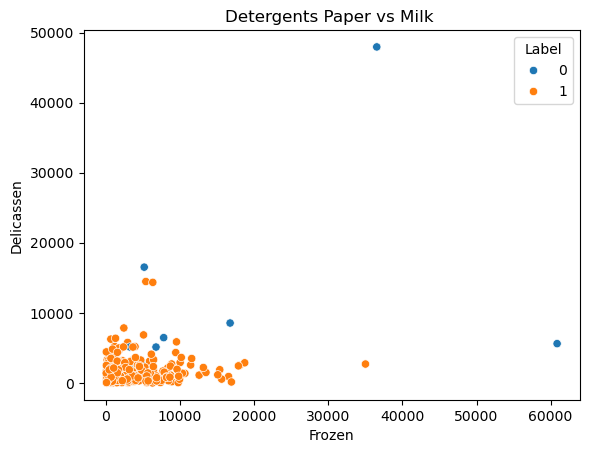

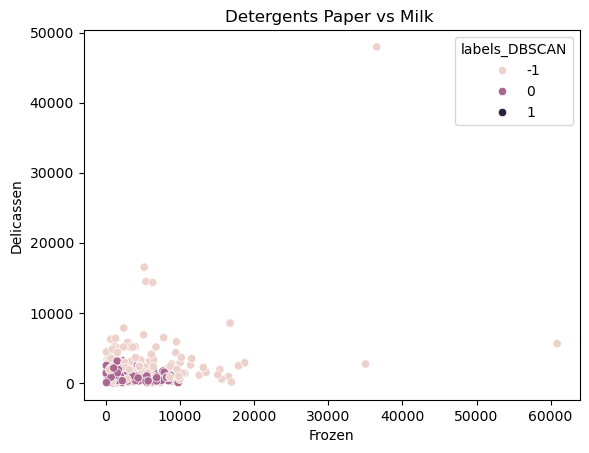

In [76]:
# Plotting the clusters using KMeans
plot(x=clean_customers['Frozen'],
     y=clean_customers['Delicassen'],
     hue=clean_customers['Label'])

# Plotting the clusters using DBSCAN
plot(x=clean_customers['Frozen'],
     y=clean_customers['Delicassen'],
     hue=clean_customers['labels_DBSCAN'])


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [87]:
kmeans_customers = clean_customers.copy()
kmeans_customers['Label'] = clusters

dbscan_customers = clean_customers.copy()
dbscan_customers['labels_DBSCAN'] = dbscan.labels_

In [90]:
# Grouping by KMeans labels and calculating mean spending
clean_customers.drop(columns='labels_DBSCAN', errors='ignore').groupby('Label').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Label,,,,,,
0,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429
1,11531.441315,4874.384977,6899.600939,2821.131455,2366.922535,1321.338028


In [91]:
# Grouping by DBSCAN labels and calculating mean spending
clean_customers.drop(columns='Label', errors='ignore').groupby('labels_DBSCAN').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000


Which algorithm appears to perform better?

**Your observations here**

- After comparing KMeans and DBSCAN clustering results, KMeans performed better on this dataset. KMeans identified two very distinct customer groups: high spenders and lower spenders, with meaningful and interpretable averages across all product categories. DBSCAN, on the other hand, marked a large number of customers as noise (-1), and also produced an unusual third cluster with very high Fresh spending and almost no spending elsewhere, which likely represents outliers.

- in my opinion, the KMeans algorithm results are more practical and usable for segmenting customers.


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [94]:
from sklearn.cluster import KMeans

# Trying with 3 clusters
kmeans_3 = KMeans(n_clusters=3).fit(customers_scale)
clean_customers['Label_3'] = kmeans_3.labels_


In [95]:
def plot(x, y, hue):
    sns.scatterplot(x=x, y=y, hue=hue)
    plt.title(f'{x.name} vs {y.name}')
    return plt.show()

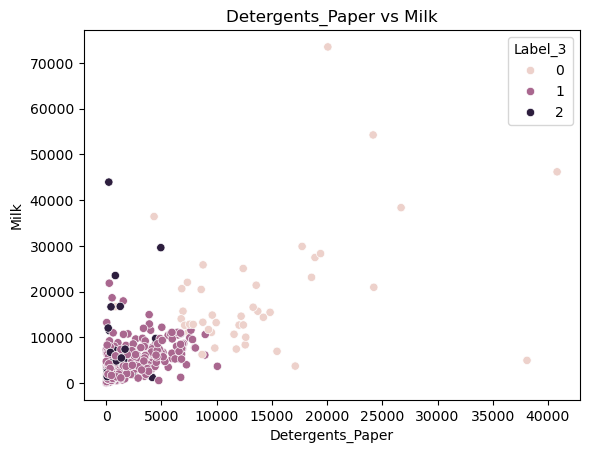

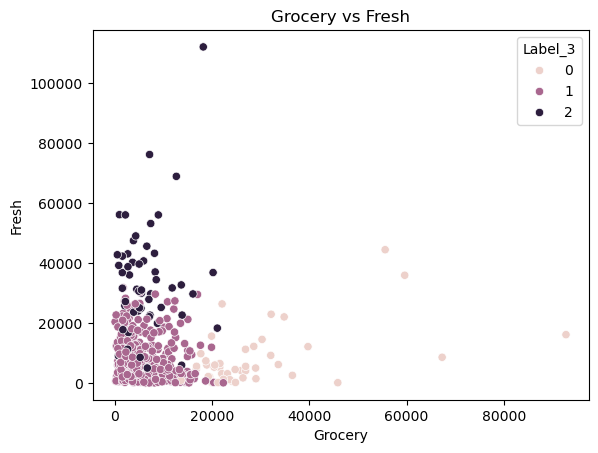

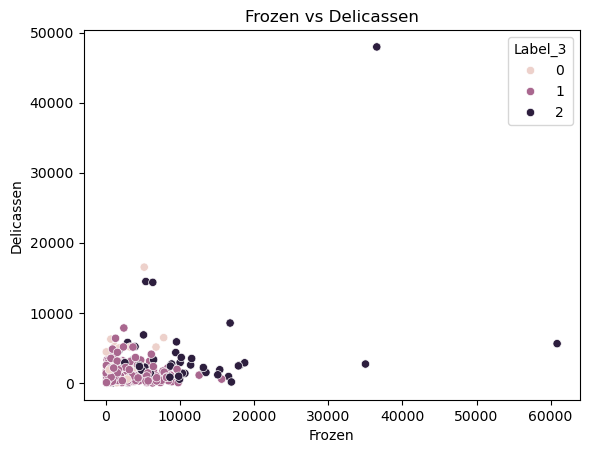

In [97]:
plot(clean_customers['Detergents_Paper'], clean_customers['Milk'], clean_customers['Label_3'])
plot(clean_customers['Grocery'], clean_customers['Fresh'], clean_customers['Label_3'])
plot(clean_customers['Frozen'], clean_customers['Delicassen'], clean_customers['Label_3'])


**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 